In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNEL = 3  # (RGB )
EPOCHS = 10  # TRAIL ERROR (TO INCREASE ACCURACY)

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


(32, 256, 256, 3)
[0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 2 1 1 0 1 1 1 1 1 1 0 0 1]


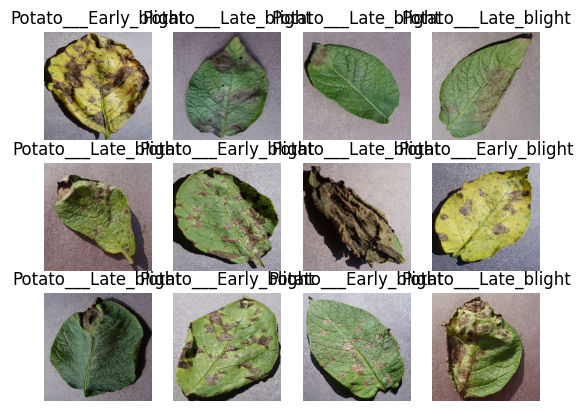

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
# Data Split:
Training: 80
Validation: 10
Test: 10

In [7]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [8]:
train_ds = dataset.take(54)
len(train_ds)

54

In [9]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [10]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [12]:
def get_dataset_partitions_tf(
    ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000
):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

54

In [15]:
len(val_ds)

6

In [16]:
len(test_ds)

8

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy() / 255)

[[[0.52156866 0.5019608  0.5294118 ]
  [0.5019608  0.48235294 0.50980395]
  [0.5882353  0.5686275  0.59607846]
  ...
  [0.68235296 0.6627451  0.6392157 ]
  [0.68235296 0.67058825 0.6431373 ]
  [0.6627451  0.6509804  0.6156863 ]]

 [[0.5372549  0.5176471  0.54509807]
  [0.5058824  0.4862745  0.5137255 ]
  [0.5686275  0.54901963 0.5764706 ]
  ...
  [0.6156863  0.59607846 0.5803922 ]
  [0.63529414 0.62352943 0.59607846]
  [0.6509804  0.6392157  0.6039216 ]]

 [[0.5803922  0.56078434 0.5882353 ]
  [0.54901963 0.5294118  0.5568628 ]
  [0.58431375 0.5647059  0.5921569 ]
  ...
  [0.6509804  0.6313726  0.6156863 ]
  [0.6431373  0.6313726  0.6117647 ]
  [0.6431373  0.6313726  0.6039216 ]]

 ...

 [[0.69411767 0.6745098  0.7019608 ]
  [0.7411765  0.72156864 0.7490196 ]
  [0.7764706  0.75686276 0.78431374]
  ...
  [0.7647059  0.7647059  0.77254903]
  [0.75686276 0.75686276 0.7647059 ]
  [0.76862746 0.76862746 0.7764706 ]]

 [[0.72156864 0.7019608  0.7294118 ]
  [0.7294118  0.70980394 0.7372549 ]


In [19]:
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential(
    [Resizing(IMAGE_SIZE, IMAGE_SIZE), Rescaling(1.0 / 255)]
)

In [20]:
from tensorflow.keras import layers
import tensorflow as tf

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
    ]
)

In [21]:
image_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
classes = 3
model = models.Sequential(
    [
        resize_and_rescale,
        data_augmentation,
        layers.Conv2D(
            32, kernel_size=(3, 3), activation="relu", input_shape=image_shape
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(classes, activation="softmax"),
    ]
)

c:\Users\jatin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4728 - loss: 0.9079 - val_accuracy: 0.4948 - val_loss: 0.7615
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7477 - loss: 0.5957 - val_accuracy: 0.8646 - val_loss: 0.4033
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 946ms/step - accuracy: 0.8617 - loss: 0.3443 - val_accuracy: 0.9062 - val_loss: 0.2190
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 941ms/step - accuracy: 0.9080 - loss: 0.2433 - val_accuracy: 0.8750 - val_loss: 0.3775
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 969ms/step - accuracy: 0.9045 - loss: 0.2486 - val_accuracy: 0.9115 - val_loss: 0.2125
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 943ms/step - accuracy: 0.9387 - loss: 0.1758 - val_accuracy: 0.9271 - val_loss: 0.2034
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 990ms/step - accuracy: 0.9190 - loss: 0.2103 - val_accuracy: 0.9427 - val_loss: 0.1718
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9479 - loss: 0.1337 - val_accuracy: 0.9

In [24]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.9023 - loss: 0.2439


In [25]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

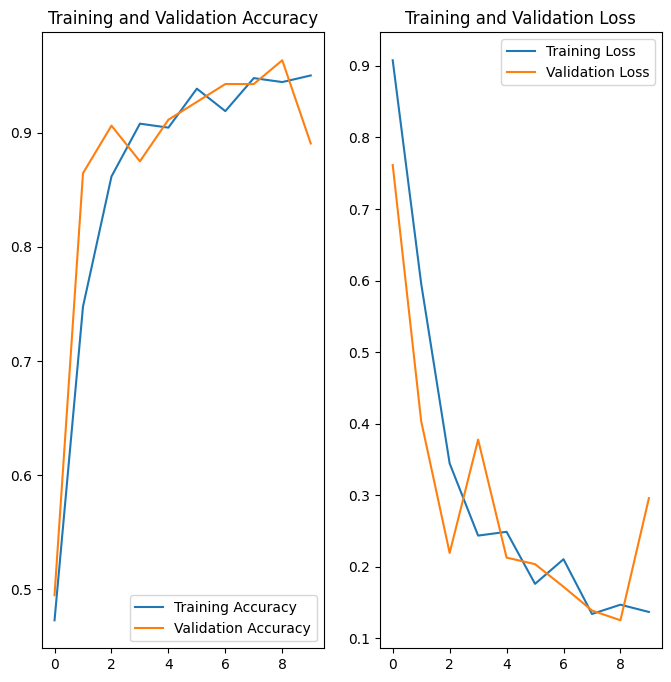

In [26]:
plt.figure(figsize=(8, 8))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
predicted label: Potato___healthy


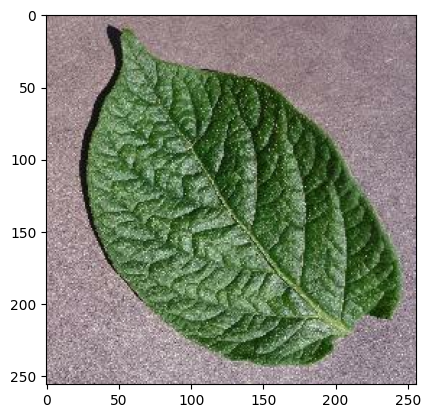

In [27]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


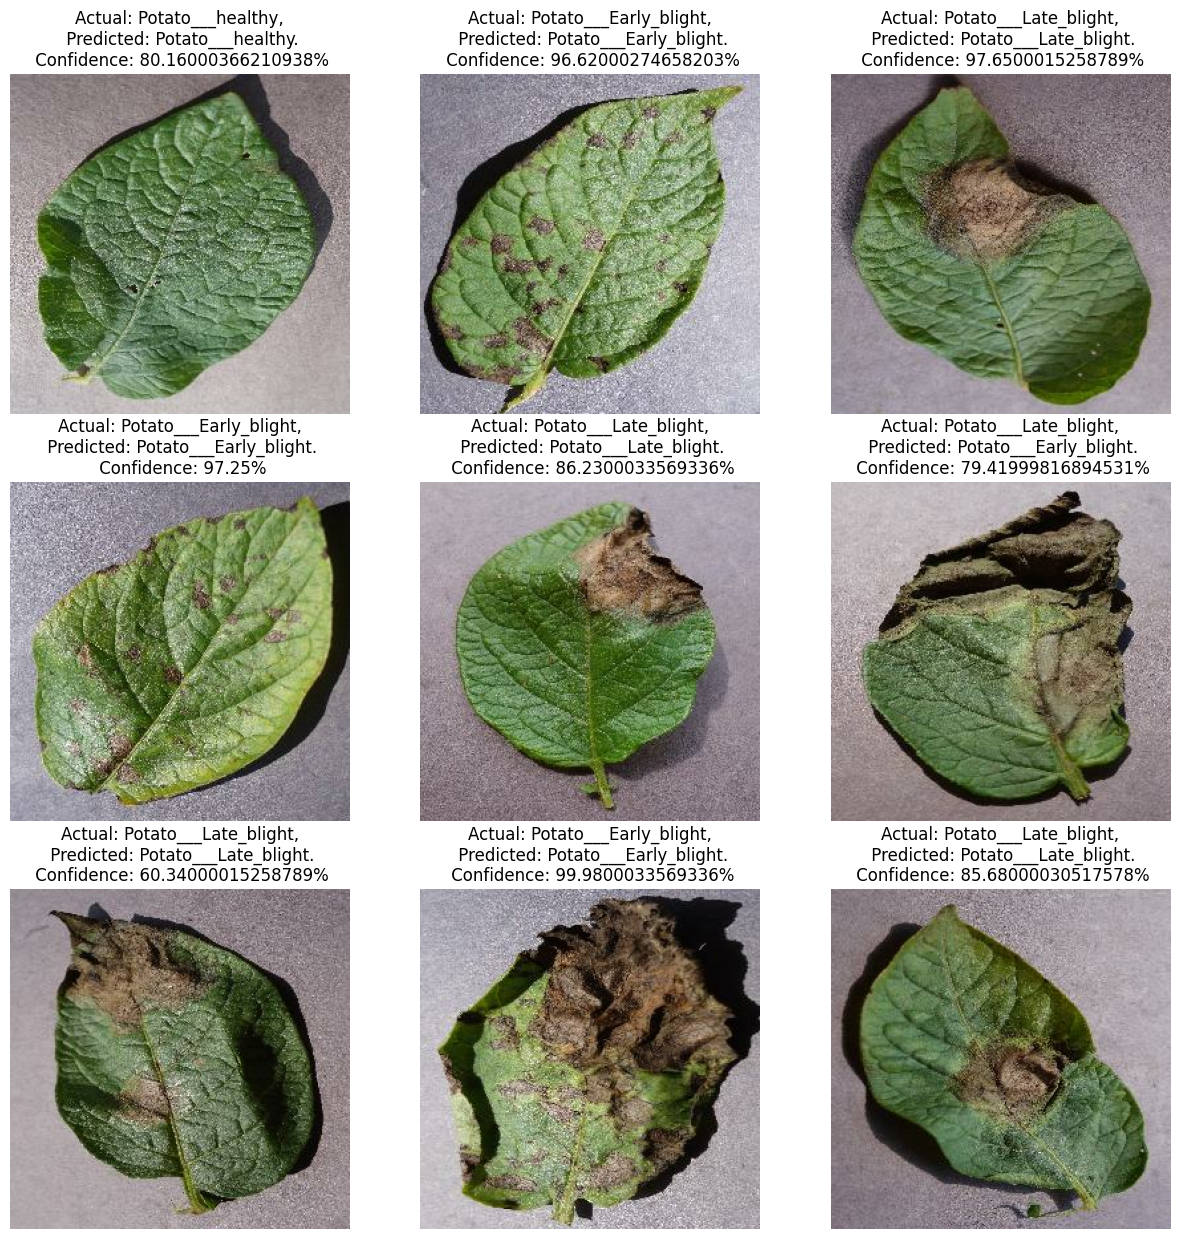

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%"
        )

        plt.axis("off")

In [ ]:
import os

os.makedirs("models", exist_ok=True)
# Find next integer version and save with .keras extension (required by Keras 3)
existing = [
    int(d.split(".")[0])
    for d in os.listdir("models")
    if d.split(".")[0].isdigit() and d.endswith(".keras")
]
model_version = (max(existing) + 1) if existing else 1
save_path = f"models/{model_version}.keras"
model.save(save_path)  # <- has .keras extension
print(f"Model saved to: {save_path}")

Model saved to: models/1.keras
